![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Exercises
## Bike store sales

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 300

In [3]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

In [4]:
sales.head()

# What is the Day column? It seems to be the day of the month that the product was sold. 
# Looks like the date has been separated to allow for deeper analysis, like which products
# sell well towards the end of the month around payday.
## What confuses me a bit though is how the cost is calculated. I guess order_quantity x unit_cost?

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
sales.shape

(113036, 18)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [6]:
# your code goes here

sales.Customer_Age.mean()

35.91921157861212

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

<AxesSubplot:>

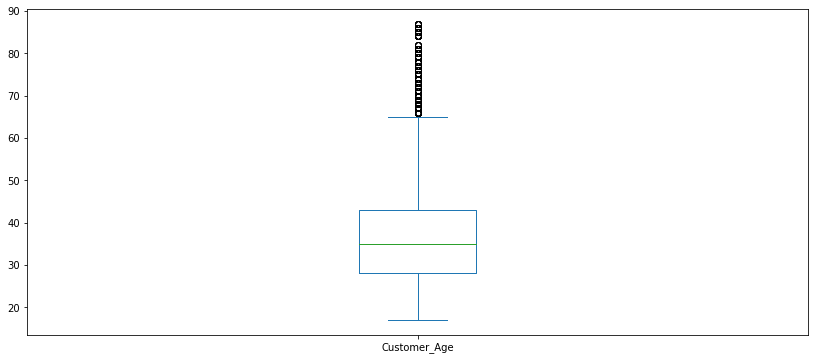

In [7]:
# your code goes here
sales.Customer_Age.plot(kind='box', figsize=(14,6))

<AxesSubplot:ylabel='Density'>

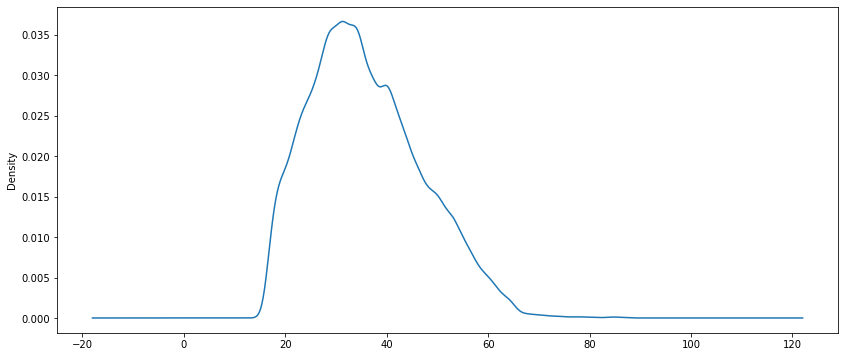

In [8]:
sales.Customer_Age.plot(kind='kde', figsize=(14,6))

# figsize parametre is a tuple of the width and height of the figure in inches
# figsize=(width, height)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [9]:
# your code goes here

sales.Order_Quantity.mean()


11.901659648253654

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

<AxesSubplot:ylabel='Frequency'>

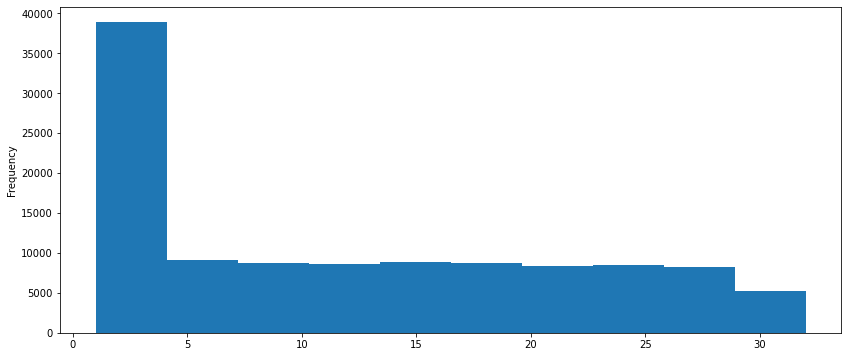

In [10]:
# your code goes here

# a histogram for order_quantity
sales.Order_Quantity.plot(kind='hist', figsize=(14,6))

# according to this histogram, nearly 40,000 orders ordered
# just between 1 to 5 items. So almost 50% of orders
# are small quantity orders

<AxesSubplot:>

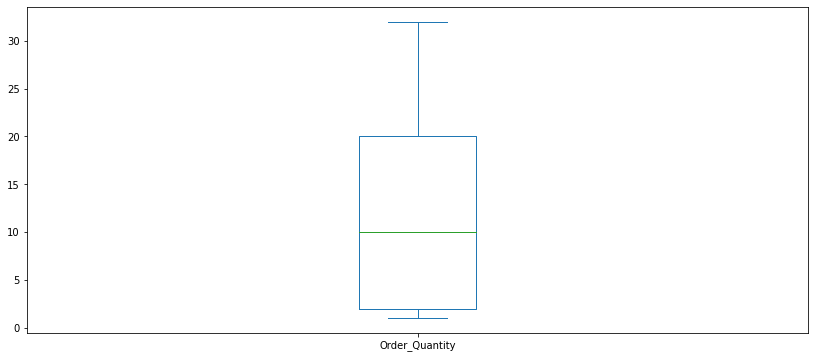

In [11]:
sales.Order_Quantity.plot(kind='box', figsize=(14,6))

# the median order quantity is around 10 items per customer
# there is some variability in the order quantity, between
# 2 to 20 items per customer
# it's a right skewed box plot, indicating that most customers do not 
# buy more than 20 items

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [12]:
# your code goes here

sales.Year.value_counts()

# we only have data from 2011 to 2016
# 2014 and 2016 were our best performing years

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

Go ahead and show a <b>pie plot</b> with the previous data:

<AxesSubplot:ylabel='Year'>

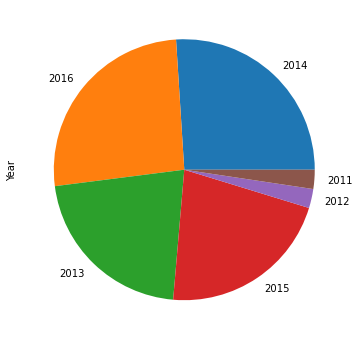

In [13]:
# your code goes here

sales.Year.value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per month do we have?

In [14]:
# your code goes here
sales.Month.value_counts()

# Our best-selling months are June (summer), December (winter), and May (spring)

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

<AxesSubplot:>

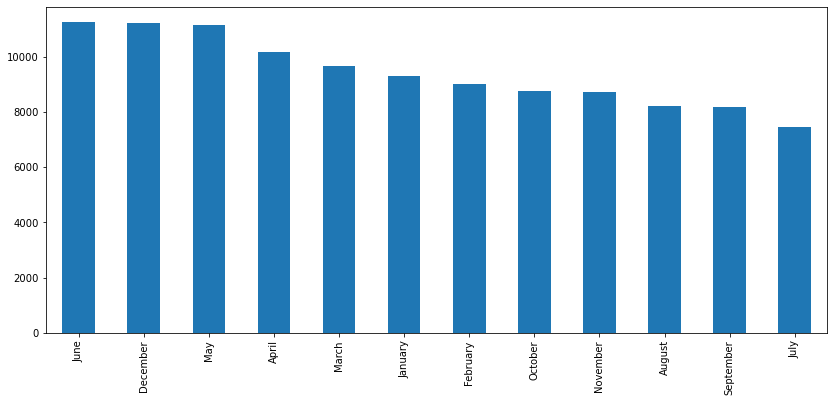

In [15]:
# your code goes here

# a bar plot for monthly sales
sales.Month.value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [16]:
# your code goes here

sales.Country.value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

An experiment to group order quantities by country and return the total sum

In [17]:
# your code goes here

# total order quantity by country

# This code below returns the entire summed dataframe for Country, sorted by Order Quantity
# sales.groupby(by=['Country']).sum().sort_values(by='Order_Quantity',ascending=False)

# This one only returns the Country column, grouped by country, and displaying the order quantities
sales.groupby(by=['Country']).Order_Quantity.sum().sort_values(ascending=False)

Country
United States     477539
Australia         263585
Canada            192259
United Kingdom    157218
France            128995
Germany           125720
Name: Order_Quantity, dtype: int64

Go ahead and show a <b>bar plot</b> of the sales per country:

<AxesSubplot:>

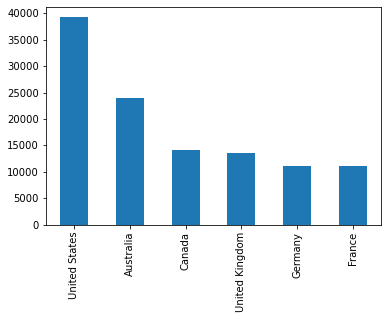

In [18]:
sales.Country.value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a list of every product sold

In [19]:
# a summary of sales quantities per product

# sales.Product.unique()

sales.Product.value_counts()

Water Bottle - 30 oz.              10794
Patch Kit/8 Patches                10416
Mountain Tire Tube                  6816
AWC Logo Cap                        4358
Sport-100 Helmet, Red               4220
Road Tire Tube                      4176
Sport-100 Helmet, Black             4152
Fender Set - Mountain               4032
Sport-100 Helmet, Blue              3788
Touring Tire Tube                   3702
Road Bottle Cage                    2640
Mountain Bottle Cage                2444
Bike Wash - Dissolver               1804
HL Mountain Tire                    1800
LL Road Tire                        1686
ML Road Tire                        1396
ML Mountain Tire                    1376
Hydration Pack - 70 oz.             1332
Mountain-200 Black, 38              1208
Mountain-200 Silver, 38             1106
Mountain-200 Silver, 42             1054
HL Road Tire                        1006
Half-Finger Gloves, S                994
Mountain-200 Black, 46               992
Mountain-200 Bla

In [20]:
# a summary of total order quantities by product

sales.groupby(by='Product').Order_Quantity.sum().sort_values(ascending=False).nlargest(10)

Product
Water Bottle - 30 oz.      164086
Patch Kit/8 Patches        157583
Mountain Tire Tube         102792
AWC Logo Cap                67316
Sport-100 Helmet, Red       63663
Road Tire Tube              62296
Fender Set - Mountain       62118
Sport-100 Helmet, Black     62105
Touring Tire Tube           56802
Sport-100 Helmet, Blue      55895
Name: Order_Quantity, dtype: int64

Create a **bar plot** showing the 10 most sold products (best sellers):

<AxesSubplot:>

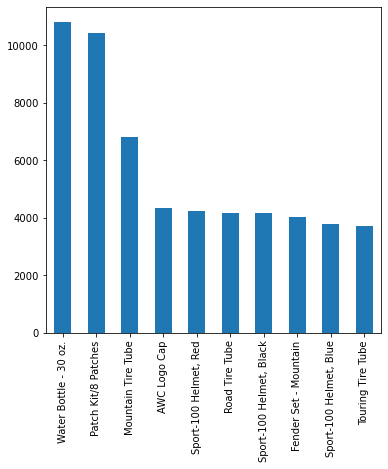

In [21]:
# Bar plot of top 10 best-selling products by sales quantity

sales.Product.value_counts().nlargest(10).plot(kind='bar', figsize=(6,6))

<AxesSubplot:xlabel='Product'>

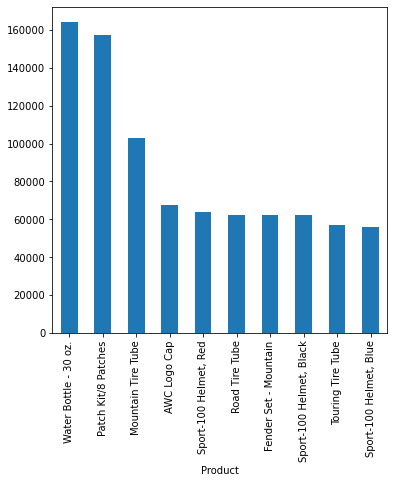

In [22]:
# Bar plot of top 10 best-selling products by order quantity

sales.groupby(by='Product').Order_Quantity.sum().sort_values(ascending=False).nlargest(10).plot(kind='bar', figsize=(6,6))

# Notice the discrepancies between the two graphs. While more customers bought the Sport-100 Helmet, Black
# per transaction, the Fender Set - Mountain had more order quantities than the Sport-100 Helmet, Black

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

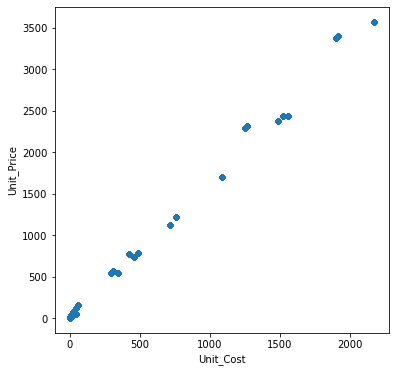

In [23]:
# your code goes here

# a simpler code I found on the internet
# plt.scatter(sales.Unit_Cost, sales.Unit_Price)

# using the simple .plot function
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

## There seems to be a very linear/strong relationship
## between unit price and unit cost. As well as a pretty
## consistent profit margin

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

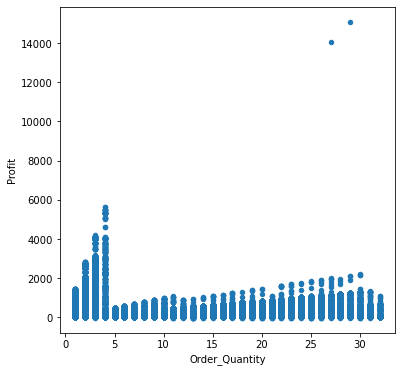

In [24]:
# your code goes here

sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize = (6,6))

# how do you even read this kind of scatterplot? It seems like
# the profit is pretty consistent at USD 2,000 no matter the 
# quantity you sell


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

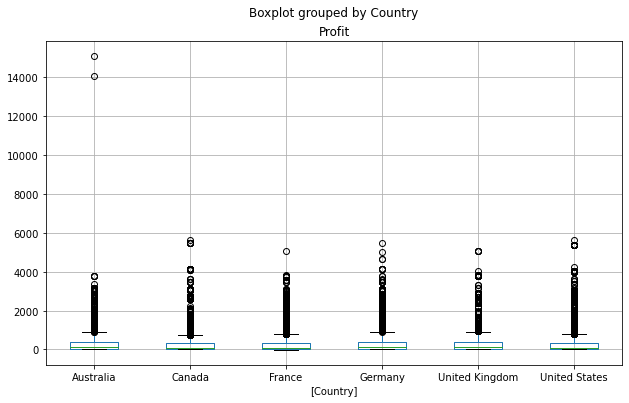

In [25]:
# your code goes here

# boxplot to show profits by country
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

# why do all of these boxplots have hundreds of outliers?

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

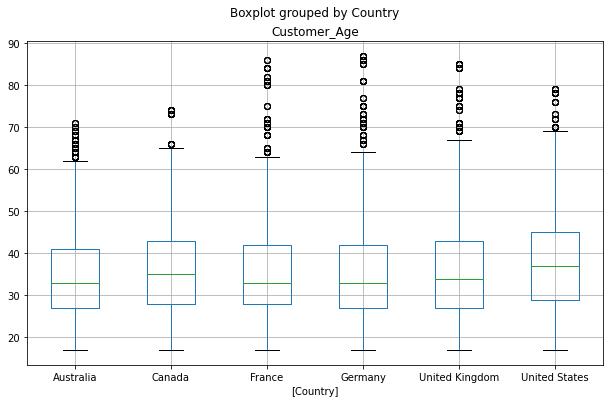

In [26]:
# your code goes here

sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

# median customer age is 32? 
# France, Germany, and the UK have customers well into their 80s

Text(0, 0.5, 'Age')

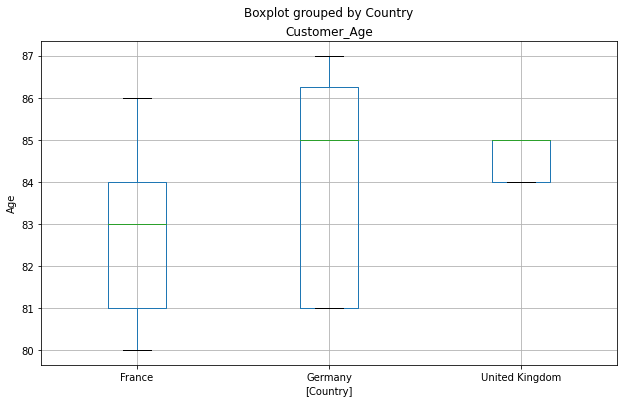

In [27]:
## Trying to create a grouped boxplot displaying the ages
## of customers above 80 from France, UK, and Germany

# sales[[Country[sales.Customer_Age >= 80], Customer_Age]]

# sales[sales.Customer_Age >= 80].plot(kind='box', x='Country', y='Customer_Age')

countryage = sales[['Country', 'Customer_Age']][sales.Customer_Age >= 80].boxplot(by='Country', figsize=(10,6))
countryage.set_ylabel('Age')

In [28]:
# how do we select customers above the age of 80 from just the UK?
# need to also understand the syntax

sales[['Country', 'Customer_Age']][sales.Customer_Age >= 80]



,Country,Customer_Age
134,Germany,87
135,Germany,87
812,United Kingdom,84
813,United Kingdom,84
21146,France,82
21147,France,82
24908,Germany,86
24909,Germany,86
28180,France,84
28181,France,84


In [29]:
sales.corr()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `Calculated_Date` column

Use `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [30]:
# your code goes here

# this new Calculated_Date column expression did not work well. Resulting column had weird strings.
# sales['Calculated_Date'] = (str(sales['Day']) + sales['Month'] + str(sales['Year']))

# Trying new solution with .astype function
sales['Calculated_Date'] = (sales['Day'].astype(str)+" "+sales['Month'].astype(str)+" "+sales['Year'].astype(str))

# sales = sales.drop(columns='Calculated_Date')

# sales['Calculated_Date'] = sales.Year+"_"+pd.to_datetime(sales.Month, format='%B').dt.month.astype(str)+"_"+sales.Day

# What is format='%B'?



In [31]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,26 November 2013
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,26 November 2015
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,23 March 2014
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,23 March 2016
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,15 May 2014


In [32]:
sales['Calculated_Date'] = pd.to_datetime(sales.Calculated_Date, format = "%d %B %Y")

In [33]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-11-26
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014-03-23
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016-03-23
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014-05-15


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Parse your `Calculated_Date` column into a datetime object

In [34]:
# See cell above

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Show a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales as the y-axis.

<AxesSubplot:>

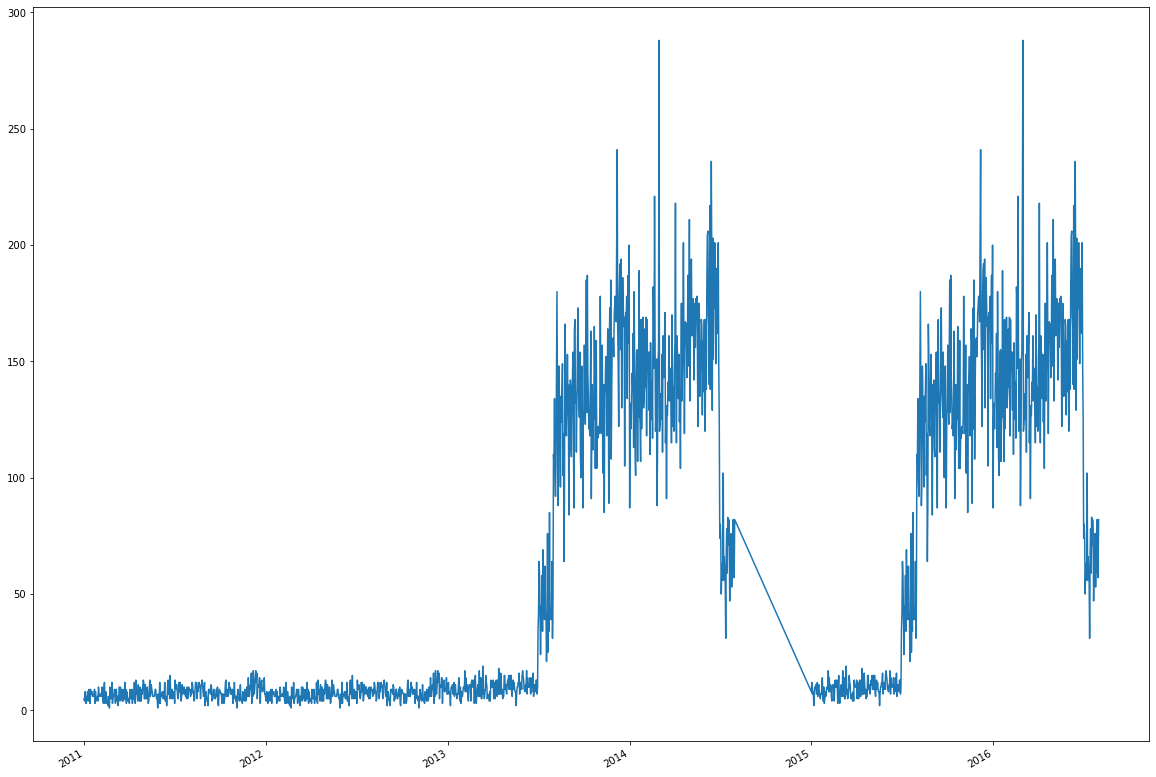

In [35]:
# your code goes here

## First attempt at writing the code for this problem
# sales.plot(kind='line', x='Calculated_Date', y=sales['Calculated_Date'].value_counts(), figsize=(20,15))

## Second attempt with the solution
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(20,15))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [36]:
# your code goes here

## Attempt 1 - using a for loop changed all the values in the column and it won't stop running
## The Revenue column is a mess
# for sale in sales.Revenue:
#     new_sale = sale + 50
#     sales.Revenue = new_sale
#     print(sales.Revenue)

## Attempt 2 - The solution was actually super simple.
## All I had to do was literally add 50 to the column :3
sales.Revenue += 50    



In [37]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-11-26
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2451,2014-03-23
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2138,2016-03-23
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,468,2014-05-15


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [40]:
# your code goes here
## This is a filtering exercise. 

## Attempt 1
france_orders = sales[sales.Country == 'France'].Order_Quantity.sum()
canada_orders = sales[sales.Country == 'Canada'].Order_Quantity.sum()

print('France orders =', france_orders)
print('Canada orders =', canada_orders)

## Attempt 2 - This returns the total order quantity for France and Canada combined
# sales.loc[(sales.Country == 'France') | (sales.Country == 'Canada')].Order_Quantity.sum()

## Attempt 3
# sales.loc[(sales.Country == 'France') | (sales.Country == 'Canada')]
# sales['Country', 'Order_Quantity'] # why does this code return an error?
# sales[['Country', 'Order_Quantity']].loc[(sales.Country == 'France') | (sales.Country == 'Canada')]
# .loc[(sales.Country == 'France') | (sales.Country == 'Canada')]

## Attempt 4 - Looks like we might need the groupby function
# What is the hierarchy of writing the code below?
sales[['Country', 'Order_Quantity']].loc[(sales.Country == 'France') | (sales.Country == 'Canada')].groupby(by='Country').sum().apply(print)
# sales[['Country', 'Order_Quantity']].groupby(by='Country').apply(print)



France orders = 128995
Canada orders = 192259
Country
Canada    192259
France    128995
Name: Order_Quantity, dtype: int64


Order_Quantity    None
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [41]:
# your code goes here

## Attempt 1- Hack and slash method to get bike rack count quickly
# sales[sales.Country == 'Canada'].Sub_Category.value_counts()

## Attempt 2
## What is the difference between 'and' and '&'?
## Do we always need .loc when filtering/selecting specific rows and columns?
sales.loc[(sales.Sub_Category == 'Bike Racks') & (sales.Country == 'Canada')].shape[0]

## We can't use the count function because it just counts the values for all of the columns
## So instead we use the shape function with index 0 to call the count of rows only

104

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [48]:
# your code goes here

sales.loc[sales.Country == 'France'].State.value_counts()

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

<AxesSubplot:>

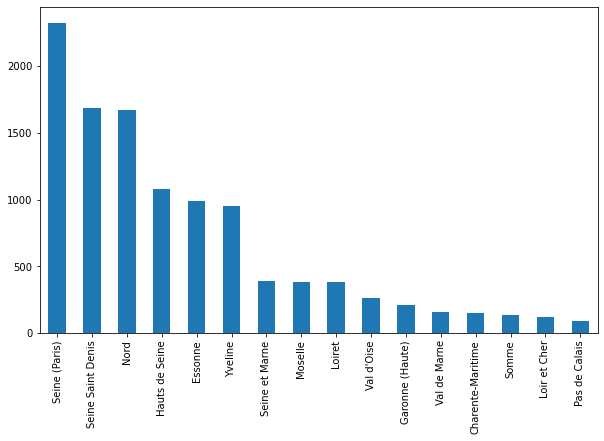

In [64]:
# your code goes here

sales.loc[sales.Country == 'France'].State.value_counts().plot(kind='bar', figsize=(10,6))


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [66]:
# your code goes here

sales.Product_Category.value_counts()


Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<AxesSubplot:ylabel='Product_Category'>

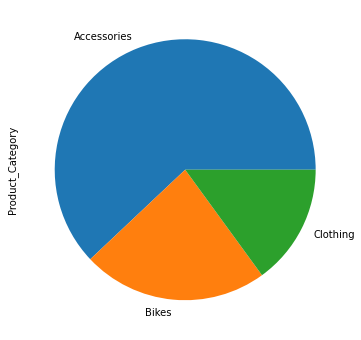

In [68]:
# your code goes here

sales.Product_Category.value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [70]:
# your code goes here

sales[['Sub_Category', 'Order_Quantity']].groupby(by='Sub_Category').sum()

,Order_Quantity
Sub_Category,
Bike Racks,4741
Bike Stands,2412
Bottles and Cages,241726
Caps,67268
Cleaners,27574
Fenders,62138
Gloves,39978
Helmets,181606
Hydration Packs,19914


Go ahead and show a <b>bar plot</b> with the results:

Text(0.5, 0, 'Sub-Category')

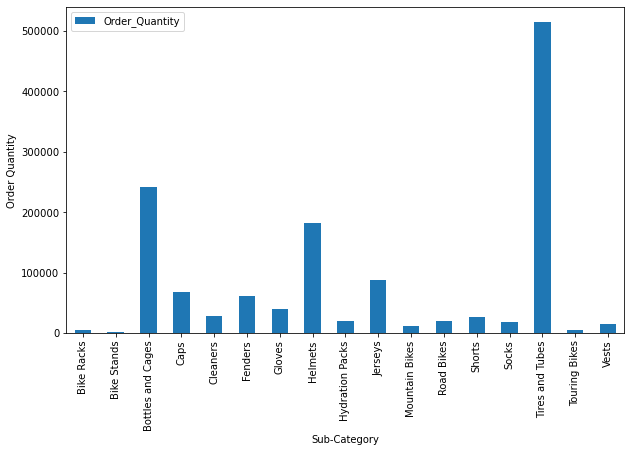

In [75]:
# your code goes here

subcat_orders = sales[['Sub_Category', 'Order_Quantity']].groupby(by='Sub_Category').sum().plot(kind='bar', figsize=(10,6))
subcat_orders.set_ylabel('Order Quantity')
subcat_orders.set_xlabel('Sub-Category')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [103]:
# your code goes here

## Attempt 1
# sales[['Product_Category', 'Sub_Category', 'Order_Quantity']].loc[(sales.Product_Category == 'Bikes')].value_counts()

## Attempt 2
# sales[['Product_Category', 'Sub_Category', 'Order_Quantity']].loc[(sales.Product_Category == 'Bikes')].groupby(by='Sub_Category').sum()

## Attempt 3
bike_cats = sales[['Product_Category', 'Sub_Category', 'Order_Quantity']].loc[(sales.Product_Category == 'Bikes')]
bike_cats.groupby('Sub_Category').sum()

### Attempts 2 and 3 both work. The only difference is clarity/breaking
### them down into lines of code. It looks like adding an aggregate
### function automatically converts a dataframegroupby object into a
### dataframe with the function already applied to it

,Order_Quantity
Sub_Category,
Mountain Bikes,11992
Road Bikes,19771
Touring Bikes,4648


Go ahead and show a <b>pie plot</b> with the results:

array([<AxesSubplot:ylabel='Order_Quantity'>], dtype=object)

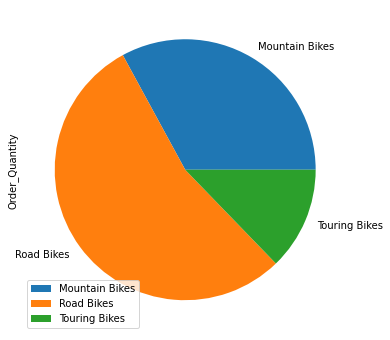

In [107]:

bike_cats.groupby('Sub_Category').sum().plot(kind='pie', subplots=True, figsize=(6,6))

## why does subplots have to be True?

In [ ]:
# your code goes here


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [109]:
# your code goes here
sales.Customer_Gender.value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [121]:
# your code goes here

## Attempt 1 - Only looking at men and the >500 condition
# sales.loc[(sales.Customer_Gender == 'M') & (sales.Revenue > 500)].shape[0]

## Attempt 2 - comparison between M and F
# sales.loc[sales.Revenue > 500].groupby('Customer_Gender').count()

## Attempt 3 - Filtered dataframe with same results
sales[['Customer_Gender', 'Revenue']].loc[sales.Revenue > 500].groupby('Customer_Gender').count()

,Revenue
Customer_Gender,
F,21482
M,23342


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [131]:
# your code goes here

## Attempt 1
## We can keep the dataframe as is. 
## What we just need to do is sort the rows by the Revenue
## column in descending order. Then we just need to select the top 5.

sales.sort_values(by='Revenue', ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [133]:
# your code goes here

sales.sort_values(by='Revenue', ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [143]:
# your code goes here

sales.loc[sales.Revenue > 10000].Order_Quantity.mean()


3.689265536723164

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [146]:
# your code goes here

sales.loc[sales.Revenue < 10000].Order_Quantity.mean()

11.914539380997528

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [155]:
# your code goes here

sales.loc[(sales.Month == 'May') & (sales.Year == 2016)].shape[0]


5015

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [172]:
# your code goes here

## Attempt 1
# sales[['Product_Category', 'Order_Quantity']].loc[(sales.Calculated_Date >= '2016-05-01') & (sales.Calculated_Date <= '2016-07-31')].groupby(by='Product_Category').sum()

sales.loc[(sales.Calculated_Date >= '2016-05-01') & (sales.Calculated_Date <= '2016-07-31')].Order_Quantity.sum()

153831

Show a grouped <b>box plot</b> per month with the profit values.

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

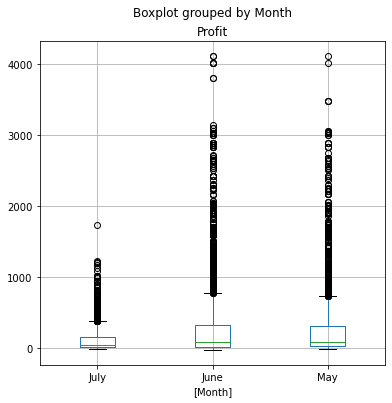

In [175]:
# your code goes here

sales[['Month', 'Profit']].loc[(sales.Calculated_Date >= '2016-05-01') & (sales.Calculated_Date <= '2016-07-31')].boxplot(by='Month', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [179]:
# your code goes here

sales.Unit_Price = sales.Unit_Price * 1.072

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)